<a href="https://colab.research.google.com/github/davidpratap2012/Deep_and_Machine_Learning_Projects/blob/master/GA_Data_Science_Instructor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Modeling Challenge

## ### Step 1 : Import the libraries and data 

In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
from pandas_profiling import ProfileReport
sns.set()

import warnings
warnings.filterwarnings('ignore')
import os

print('Libraries imported')

Libraries imported


### installing dependencies

In [ ]:
!pip install pandas-profiling==2.7.1

  Using cached https://files.pythonhosted.org/packages/50/8a/25da481171f4912e2515a76fe31b7a4f036a443b8858b244ef7daaffd5b6/pandas_profiling-2.7.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/13/fe/7614dec3db3f20882ff12dae0a58b579e97b590f2994ce9c953fe179d512/visions-0.4.1-py3-none-any.whl
ERROR: pycaret 2.3.1 has requirement pandas-profiling>=2.8.0, but you'll have pandas-profiling 2.7.1 which is incompatible.
  Found existing installation: visions 0.7.1
    Uninstalling visions-0.7.1:
      Successfully uninstalled visions-0.7.1
  Found existing installation: pandas-profiling 3.0.0
    Uninstalling pandas-profiling-3.0.0:
      Successfully uninstalled pandas-profiling-3.0.0


In [ ]:
!pip install pycaret

  Using cached https://files.pythonhosted.org/packages/3b/a3/34519d16e5ebe69bad30c5526deea2c3912634ced7f9b5e6e0bb9dbbd567/pandas_profiling-3.0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/80/96/01e4ba22cef96ae5035dbcf0451c2f4f859f8f17393b98406b23f0034279/visions-0.7.1-py3-none-any.whl
  Found existing installation: visions 0.4.1
    Uninstalling visions-0.4.1:
      Successfully uninstalled visions-0.4.1
  Found existing installation: pandas-profiling 2.7.1
    Uninstalling pandas-profiling-2.7.1:
      Successfully uninstalled pandas-profiling-2.7.1


In [ ]:
# importing our dataset 
data=pd.read_csv('breast-cancer.csv')
cols=['ID',
'diagnosis',
'radius_mean',
'radius_sd_error',
'radius_worst',
'texture_mean',
'texture_sd_error',
'texture_worst',
'perimeter_mean',
'perimeter_sd_error',
'perimeter_worst',
'area_mean',
'area_sd_error',
'area_worst',
'smoothness_mean',
'smoothness_sd_error',
'smoothness_worst',
'compactness_mean',
'compactness_sd_error',
'compactness_worst',
'concavity_mean',
'concavity_sd_error',
'concavity_worst',
'concave_points_mean',
'concave_points_sd_error',
'concave_points_worst',
'symmetry_mean',
'symmetry_sd_error',
'symmetry_worst',
'fractal_dimension_mean',
'fractal_dimension_sd_error',
'fractal_dimension_worst']
data.columns=cols
# let us drop the ID as it is redundant for our analysis 
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Step 2: Data Sanity Check 

In [ ]:
print(data.shape)

(568, 32)


There are 568 rows and 32 columns.

In [ ]:
# check for missing values in the data set 
def check_miss(data):
    '''
    data: requires a dataframe
    ---
    returns: a dataframe with details of missing values'''
    
    cnull=[sum(data[y].isnull()) for y in data.columns]
    miss=pd.DataFrame({'Null_Values':[any(data[x].isnull())for x in data.columns],
                       'Count_Nulls':cnull,
                       'Percentage_Nulls':list((np.array(cnull)*100)/data.shape[0]),
                        'MValues':cnull,
                       'Dtype': data.dtypes
                      })
    return miss.sort_values(by='MValues', ascending=False)

In [ ]:
check_miss(data)

,Null_Values,Count_Nulls,Percentage_Nulls,MValues,Dtype
ID,False,0,0.0,0,int64
diagnosis,False,0,0.0,0,object
fractal_dimension_sd_error,False,0,0.0,0,float64
fractal_dimension_mean,False,0,0.0,0,float64
symmetry_worst,False,0,0.0,0,float64
symmetry_sd_error,False,0,0.0,0,float64
symmetry_mean,False,0,0.0,0,float64
concave_points_worst,False,0,0.0,0,float64
concave_points_sd_error,False,0,0.0,0,float64
concave_points_mean,False,0,0.0,0,float64


 There are no missing values. The column index gives the id of each participant. The diagnosis is the outcome where M='malign' and B='benign'. Apart from these there are 29 features giving various cell measurements which are float values

In [ ]:
# Let us convert all the labels to numbers 
d={'B':0, 'M':1}
data['diagnosis']=data['diagnosis'].map(d)
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [ ]:
# Seperate the features and Label
X=data.drop(['diagnosis', 'ID'], axis=1)
y=data['diagnosis']

In [ ]:
# Let us check if any column in feature X has any other values apart from real numbers, i.e, we want check if there are any corrupted values 
 # like "?" and "#"
# we use np.array which is a numpy function that checks each column for each roe and returns a boolen array, where True if
# input element is a real number
# applymap is pandas dataframe function that applies the np.isreal function  columnwise
# Following code selects those rows which have some non-numeric values is any of the olumsn and hence the ~ symbol

X[~X.applymap(np.isreal).all(1)]
    

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst


There are no corrupt values in the dataset

### Exploratory Data Analysis 

In [ ]:
# Let us analyze the descriptives of the various attributes
X.describe().T

,count,mean,std,min,25%,50%,75%,max
radius_mean,568.0,14.120491,3.523416,6.981000,11.697500,13.355000,15.780000,28.11000
radius_sd_error,568.0,19.305335,4.288506,9.710000,16.177500,18.855000,21.802500,39.28000
radius_worst,568.0,91.914754,24.285848,43.790000,75.135000,86.210000,103.875000,188.50000
texture_mean,568.0,654.279754,351.923751,143.500000,420.175000,548.750000,782.625000,2501.00000
texture_sd_error,568.0,0.096321,0.014046,0.052630,0.086290,0.095865,0.105300,0.16340
texture_worst,568.0,0.104036,0.052355,0.019380,0.064815,0.092525,0.130400,0.34540
perimeter_mean,568.0,0.088427,0.079294,0.000000,0.029540,0.061400,0.129650,0.42680
perimeter_sd_error,568.0,0.048746,0.038617,0.000000,0.020310,0.033455,0.073730,0.20120
perimeter_worst,568.0,0.181055,0.027319,0.106000,0.161900,0.179200,0.195625,0.30400
area_mean,568.0,0.062770,0.007035,0.049960,0.057697,0.061515,0.066120,0.09744


radius_mean


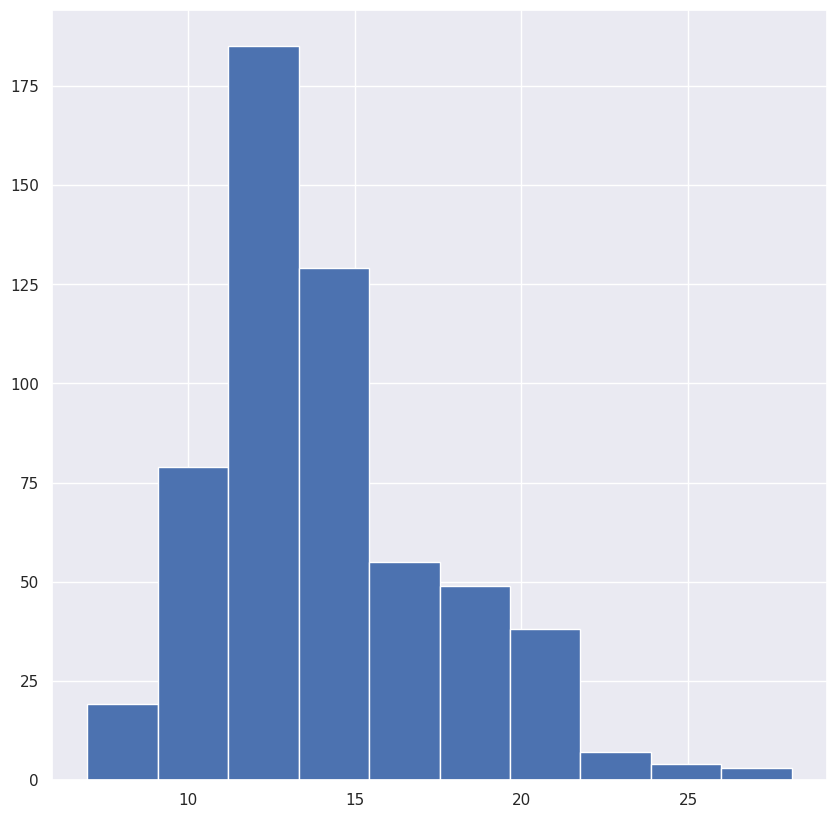

radius_sd_error


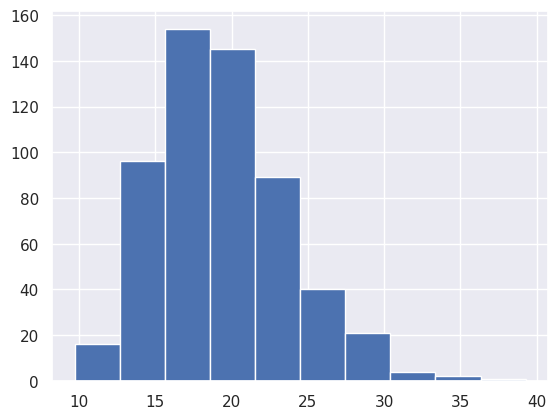

radius_worst


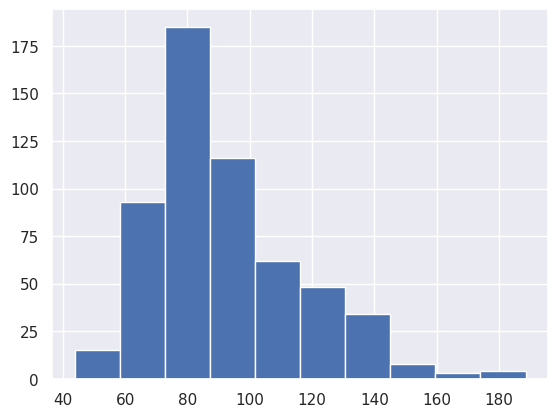

texture_mean


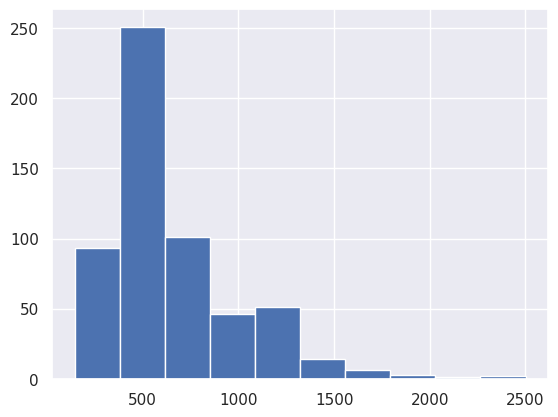

texture_sd_error


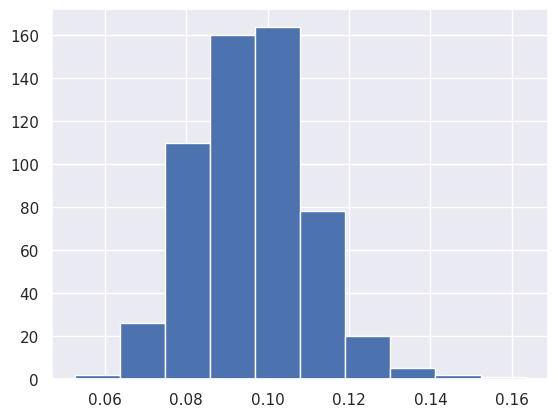

texture_worst


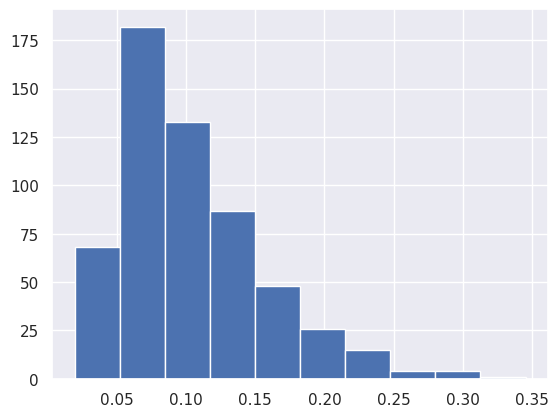

perimeter_mean


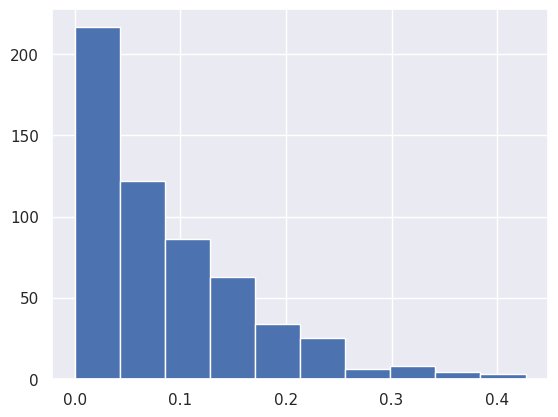

perimeter_sd_error


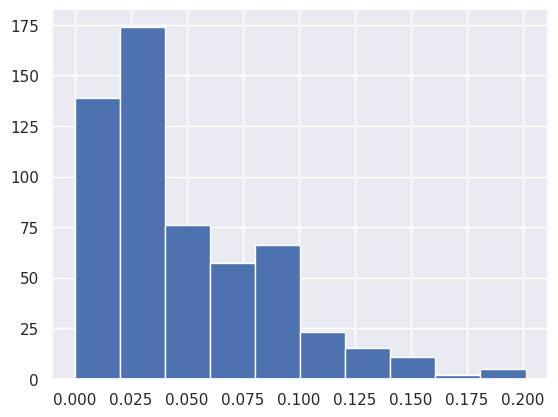

perimeter_worst


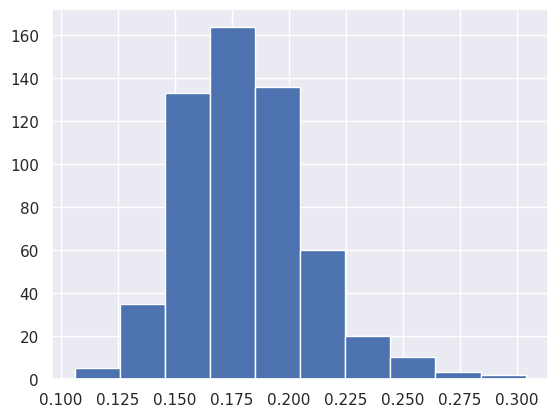

area_mean


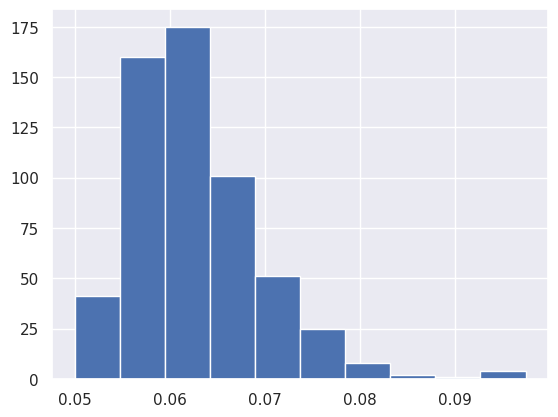

area_sd_error


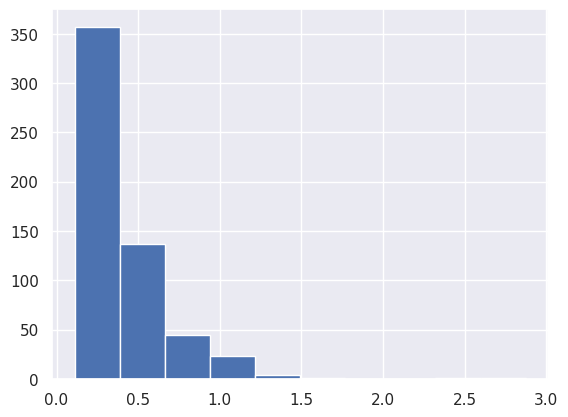

area_worst


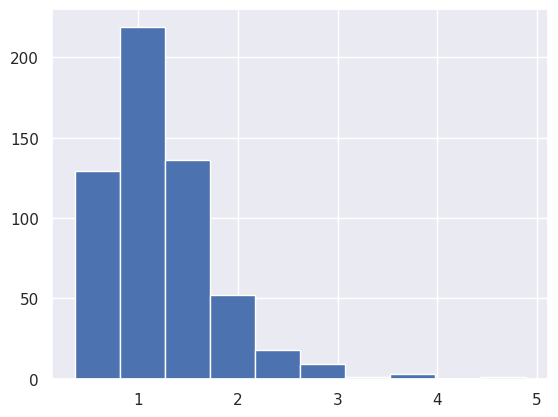

smoothness_mean


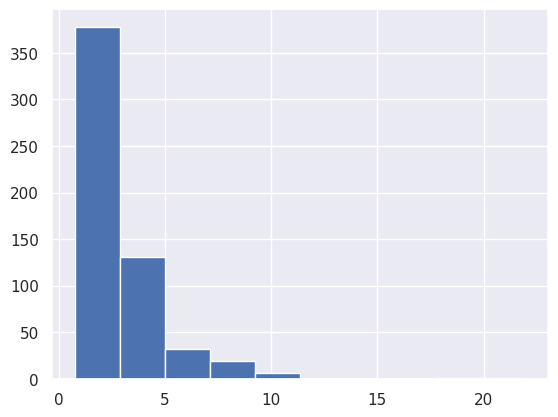

smoothness_sd_error


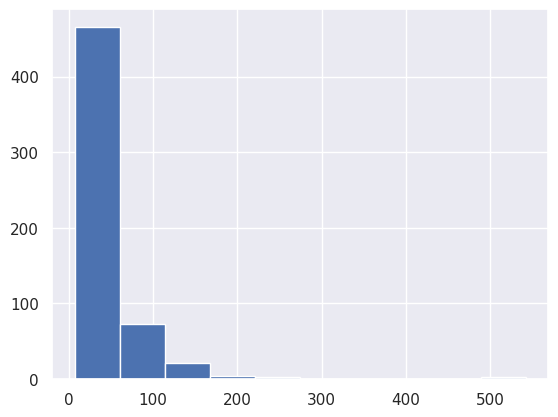

smoothness_worst


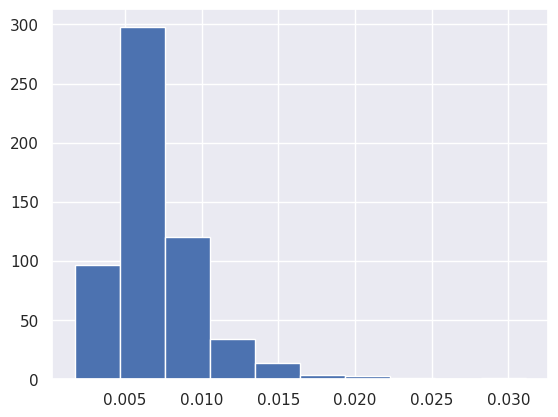

compactness_mean


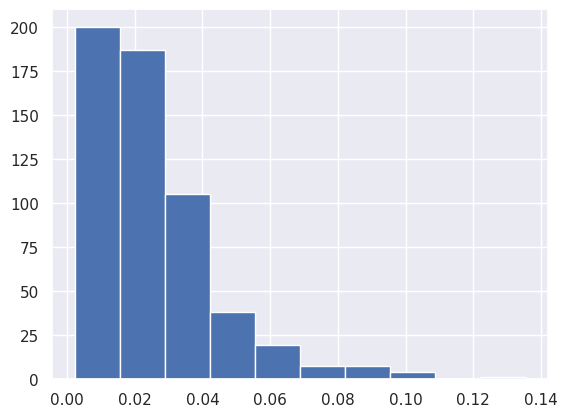

compactness_sd_error


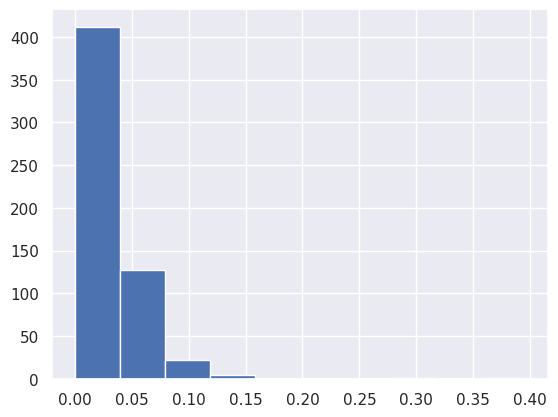

compactness_worst


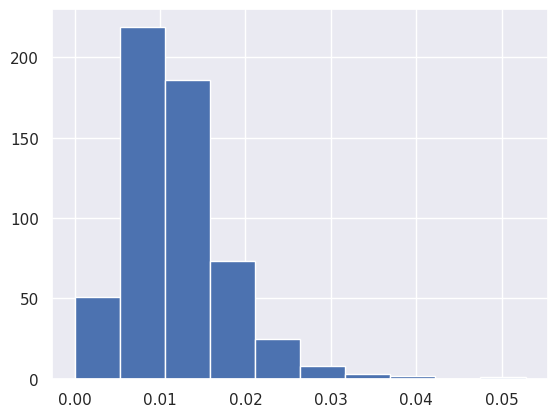

concavity_mean


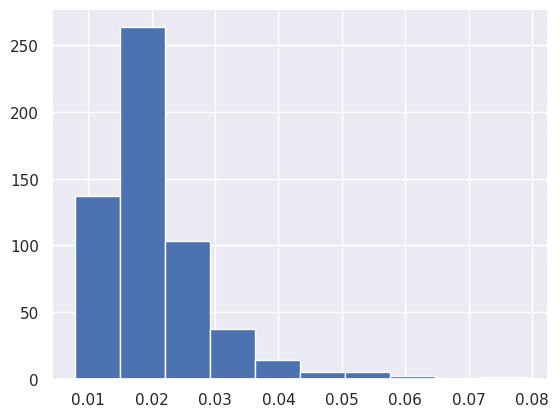

concavity_sd_error


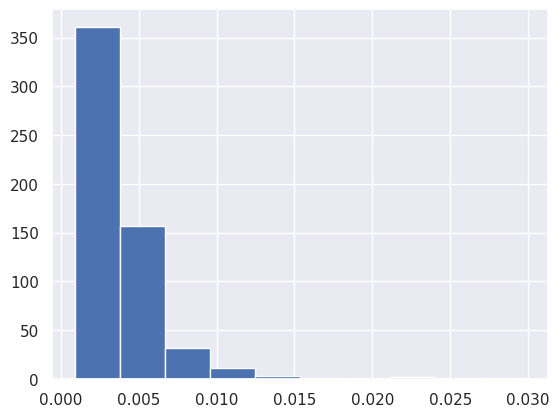

concavity_worst


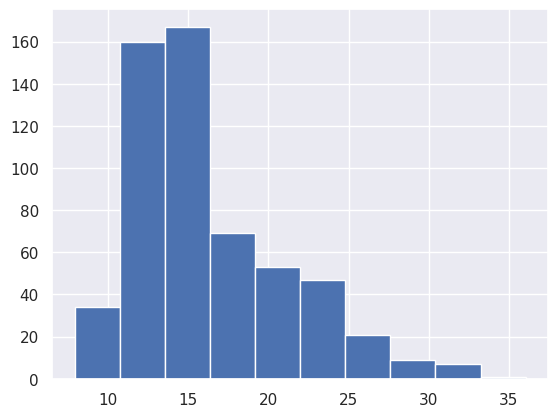

concave_points_mean


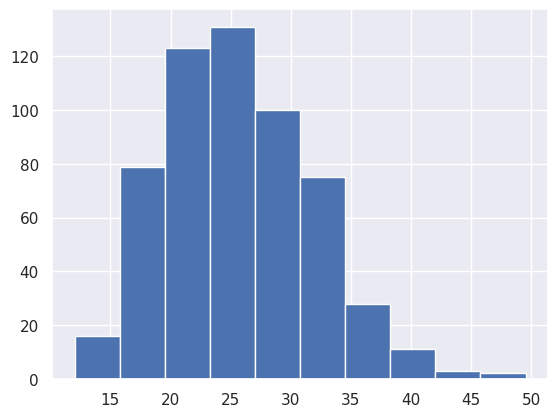

concave_points_sd_error


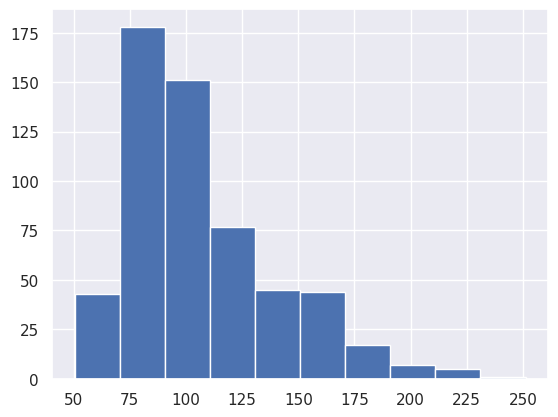

concave_points_worst


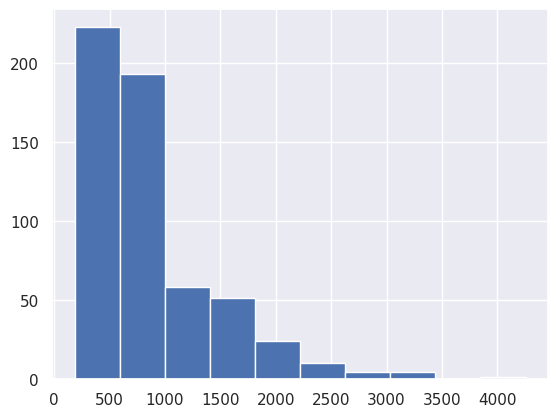

symmetry_mean


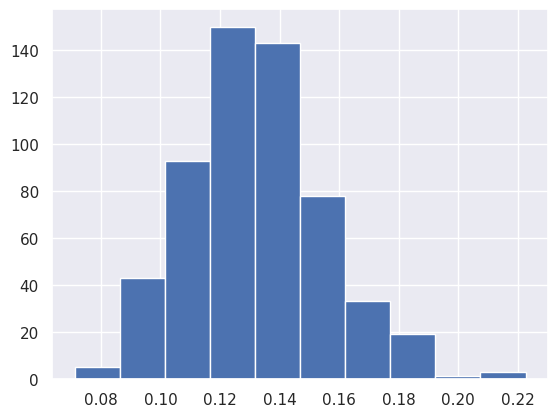

symmetry_sd_error


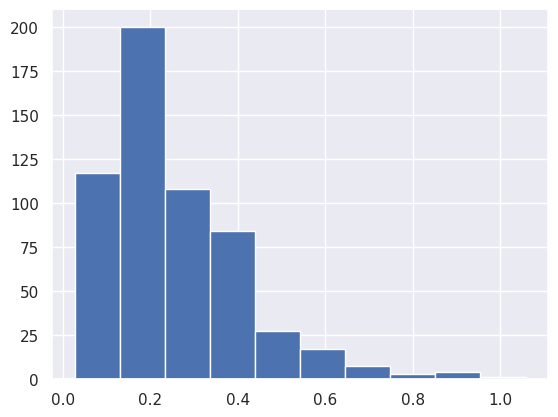

symmetry_worst


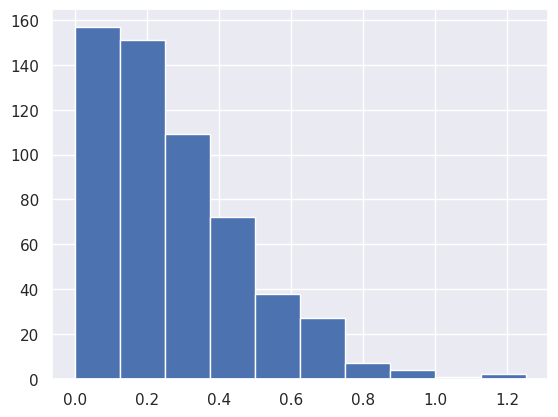

fractal_dimension_mean


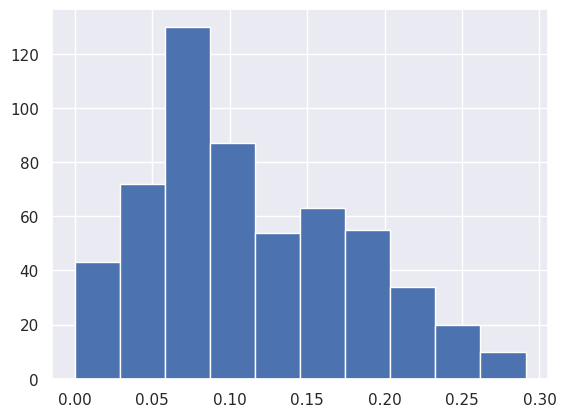

fractal_dimension_sd_error


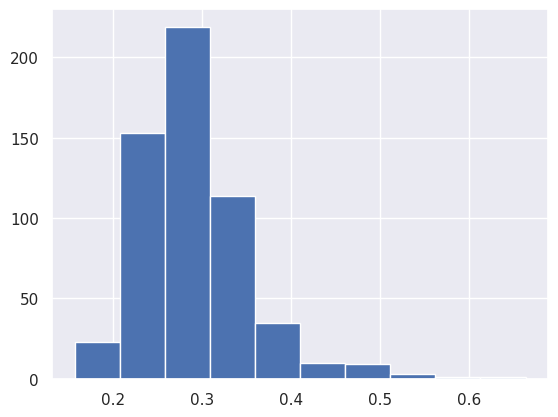

fractal_dimension_worst


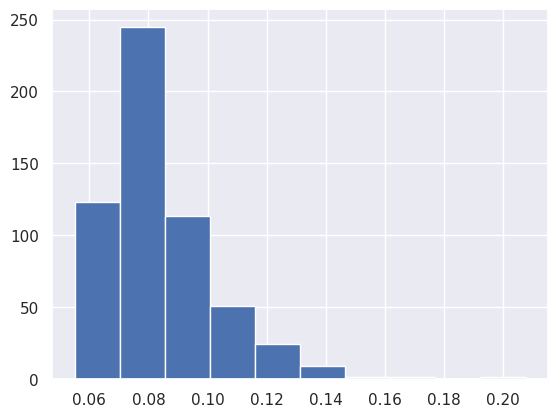

In [ ]:
# let us analyze the distributions of the various atrributes
plt.figure(figsize=(10,10))
for var in X.columns:
  print(var)
  X[var].hist()
  plt.show()
# plt.tight_layout()

Some of the distributions look very skewed , lets analyze using pandas profiling

In [ ]:
!pip install sweetviz

In [ ]:
# Importing sweetviz
import sweetviz as sv

#Analyzing the dataset
report=sv.analyze(data)

#Display the report
report.show_html('eda_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report eda_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


**Observations:**

- There are **31** variables or features in the dataframe and the total number of instances or rows are **558**
- We have **30** Numeric and **1** Boolean variable
- There are no missing cells in the dataset which is a big relief
- There are no duplicate rows 
- There are some columns having '0' values , we need to check if that is ok or is it a mistake
___

In [ ]:
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


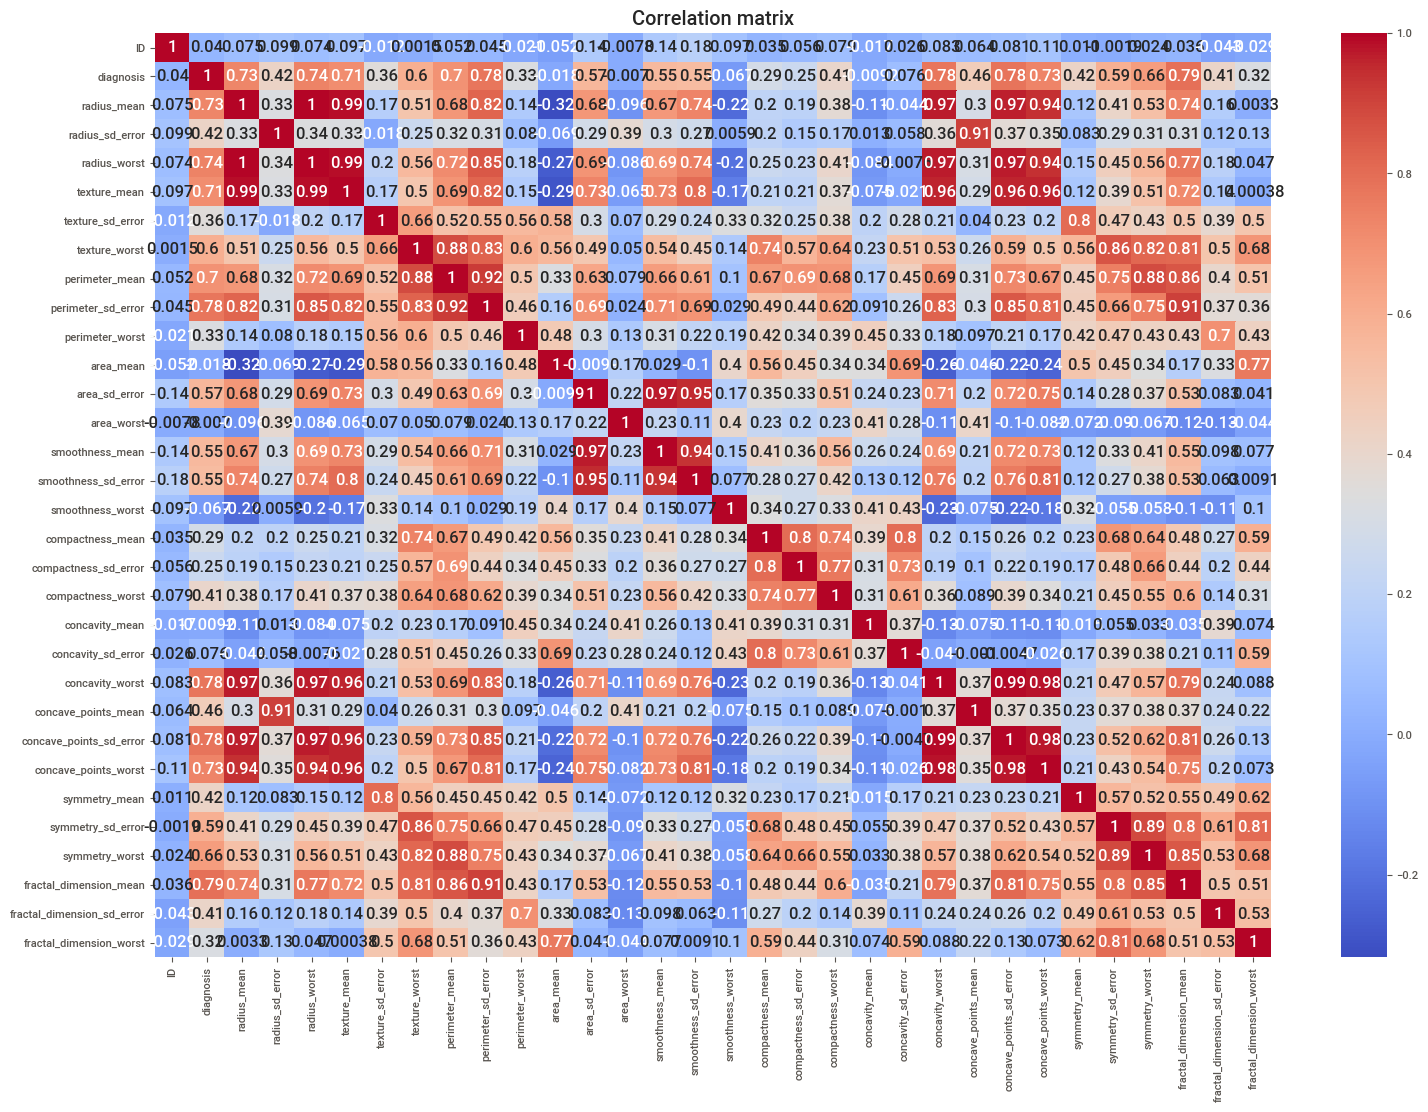

In [ ]:
# Produce a Correlation Matrix 
corr = data.corr()
fig, ax = plt.subplots(figsize=(18,12))
sns.heatmap(corr, annot=True, annot_kws={"size":12}, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

Some of the variables appear to have strong correlation with diagnosis like fractal_dimension_mean, concavity worst, concavity_point_sd_error and perimeter_sd_error. These maybe termed as strong predictors of the outcome. 

## Step 4 : Modelling

In [ ]:
# Make a Train Test Split 

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.2, stratify = y)

### Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfc=RandomForestClassifier(random_state=42)
rfc.fit(X_train, y_train)
predicted=rfc.predict(X_test)

# Checking the Model Accuracy
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)
#train.to_csv( "pred.csv")

Your Model Accuracy is 0.9385964912280702


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
rfc_roc=roc_auc_score(y_test, predicted)
rfc_acc = accuracy_score(y_test, predicted)
rfc_prec = precision_score(y_test, predicted)
rfc_rec = recall_score(y_test, predicted)
rfc_f1 = f1_score(y_test, predicted)
print(rfc_f1)

0.9195402298850575


In [ ]:
#GridSearchCV
from sklearn.model_selection import GridSearchCV

rfc=RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 200}

In [ ]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 200, max_depth=5, criterion='gini')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9298245614035088


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
gd_roc=roc_auc_score(y_test, pred)
gd_acc = accuracy_score(y_test, pred)
gd_prec = precision_score(y_test, pred)
gd_rec = recall_score(y_test, pred)
gd_f1 = f1_score(y_test, pred)
print(gd_roc, gd_acc, gd_prec, gd_rec, gd_f1)

0.9295634920634921 0.9298245614035088 0.8863636363636364 0.9285714285714286 0.9069767441860465


Support vector machines

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score

# Create Linear SVM object
support = svm.LinearSVC(random_state=20)

# Train the model using the training sets 
support.fit(X_train, y_train)
predicted = support.predict(X_test)

# Checking the Model Accuracy
score=accuracy_score(y_test,predicted)
print("Your Model Accuracy is", score)
#train.to_csv( "pred.csv")

Your Model Accuracy is 0.8947368421052632


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
predicted = support.predict(X_test)
svm_roc=roc_auc_score(y_test, predicted)
svm_acc = accuracy_score(y_test, predicted)
svm_prec = precision_score(y_test, predicted)
svm_rec = recall_score(y_test, predicted)
svm_f1 = f1_score(y_test, predicted)
print(svm_f1)

0.8333333333333333


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#metrics
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')  # here k=3
model.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [ ]:
y_pred2=model.predict(X_test)
print(accuracy_score(y_test,y_pred2))

0.9035087719298246


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, classification_report

knn_roc=roc_auc_score(y_test, y_pred2)
knn_acc = accuracy_score(y_test, y_pred2)
knn_prec = precision_score(y_test, y_pred2)
knn_rec = recall_score(y_test, y_pred2)
knn_f1 = f1_score(y_test, y_pred2)

Minimum error:- 0.07894736842105263 at K = 27


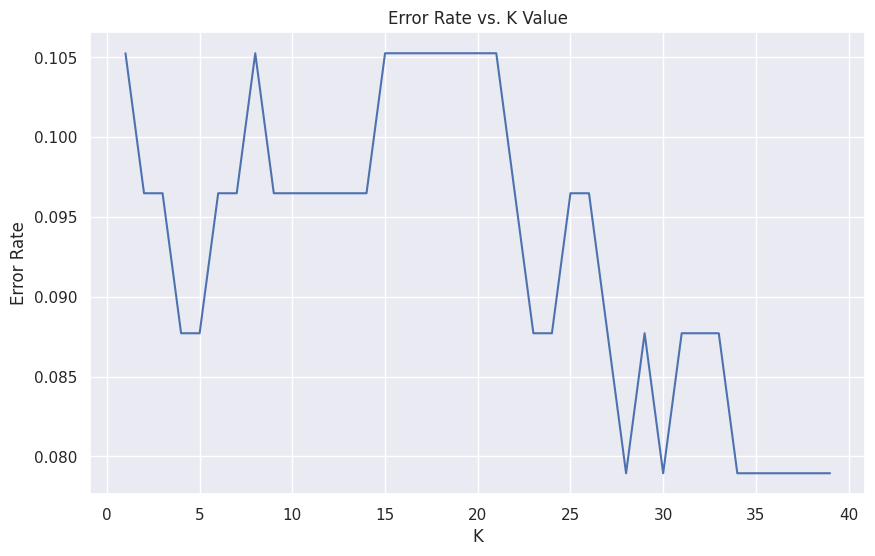

In [ ]:
# Choosing k
#This cell will take around 30 to 45 mins to execute

error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit( X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

**Re-train the KNN Model with the optimal value of K**

In [ ]:
model=KNeighborsClassifier(n_neighbors=7,metric='euclidean')  # here k=7
model.fit(X_train,y_train)

y_pred2=model.predict(X_test)

print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93        72
           1       0.90      0.83      0.86        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.90      0.90       114



####**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [ ]:
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.9122807017543859


In [ ]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score

roc=roc_auc_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
results = pd.DataFrame([['RandomForestClassifier',rfc_acc,rfc_prec,rfc_rec, rfc_f1,rfc_roc],
                        ['Naive Bayes Classifier', acc,prec,rec, f1,roc],
                        ['Support Vector Machine', svm_acc, svm_prec, svm_rec, svm_f1, svm_roc],
                        ['K- Nearest Neigbor', knn_acc, knn_prec, knn_rec, knn_f1, knn_roc]
                        ],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,RandomForestClassifier,0.938596,0.888889,0.952381,0.919540,0.941468
1,Naive Bayes Classifier,0.912281,0.880952,0.880952,0.880952,0.905754
2,Support Vector Machine,0.894737,1.000000,0.714286,0.833333,0.857143
3,K- Nearest Neigbor,0.903509,0.878049,0.857143,0.867470,0.893849


Random Forest has emerged the Winner

###**PyCaret**


Use **PyCaret** to find the best model and perform Automatic Hyperparameter tuning

In [149]:
import pycaret.classification as pc
#dir(pc)

In [150]:
#Loading the dataset
import pandas as pd
df = pd.read_csv('breast-cancer.csv')
df.columns=cols
df.head() #Printing the first 5 rows of dataframe

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,area_sd_error,area_worst,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst,concavity_mean,concavity_sd_error,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613,0.3345,0.8902,2.217,27.19,0.007510,0.03345,0.03672,0.01137,0.02165,0.005082,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


####**Initialize or setup the environment**

In [151]:
pc.setup(df, target='diagnosis')

,Description,Value
0,session_id,385
1,Target,diagnosis
2,Target Type,Binary
3,Label Encoded,"B: 0, M: 1"
4,Original Data,"(568, 32)"
5,Missing Values,False
6,Numeric Features,31
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


('box-cox',
 [],
 False,
            ID diagnosis  ...  fractal_dimension_sd_error  fractal_dimension_worst
 0      842517         M  ...                      0.2750                  0.08902
 1    84300903         M  ...                      0.3613                  0.08758
 2    84348301         M  ...                      0.6638                  0.17300
 3    84358402         M  ...                      0.2364                  0.07678
 4      843786         M  ...                      0.3985                  0.12440
 ..        ...       ...  ...                         ...                      ...
 563    926424         M  ...                      0.2060                  0.07115
 564    926682         M  ...                      0.2572                  0.06637
 565    926954         M  ...                      0.2218                  0.07820
 566    927241         M  ...                      0.4087                  0.12400
 567     92751         B  ...                      0.2871     

___
**Observations:**
- The target type  is **Binary** because we have two values in **diagnosis** column i.e., **0** and **1**
- The data contains **30** Numeric Features 
___

In [152]:
pc.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9674,0.9897,0.9462,0.9690,0.9564,0.9304,0.9318,0.451
et,Extra Trees Classifier,0.9673,0.9968,0.9395,0.9750,0.9560,0.9300,0.9315,0.409
gbc,Gradient Boosting Classifier,0.9647,0.9920,0.9324,0.9742,0.9516,0.9239,0.9258,0.218
ridge,Ridge Classifier,0.9596,0.0000,0.8986,0.9938,0.9425,0.9116,0.9157,0.011
qda,Quadratic Discriminant Analysis,0.9574,0.9829,0.9462,0.9441,0.9438,0.9095,0.9111,0.013
lightgbm,Light Gradient Boosting Machine,0.9546,0.9938,0.9186,0.9609,0.9373,0.9018,0.9044,0.113
ada,Ada Boost Classifier,0.9521,0.9954,0.9186,0.9590,0.9344,0.8968,0.9018,0.112
lda,Linear Discriminant Analysis,0.9519,0.9923,0.8781,0.9938,0.9288,0.8933,0.9005,0.013
dt,Decision Tree Classifier,0.9397,0.9330,0.9062,0.9347,0.9154,0.8690,0.8742,0.014
knn,K Neighbors Classifier,0.6979,0.7730,0.4324,0.6463,0.5116,0.3071,0.3228,0.113


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=385, verbose=0,
                       warm_start=False)

In [153]:
rf_model = pc.create_model('rf') #Performs K-Fold (10) CV for the selected model

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9500,0.9827,0.9333,0.9333,0.9333,0.8933,0.8933
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9500,0.9933,0.9333,0.9333,0.9333,0.8933,0.8933
3,0.9500,0.9787,0.8667,1.0000,0.9286,0.8904,0.8958
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459,0.9473
6,0.9000,0.9440,0.9333,0.8235,0.8750,0.7922,0.7965
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,1.0000,0.9286,1.0000,0.9630,0.9434,0.9449
9,0.9744,0.9986,0.9333,1.0000,0.9655,0.9451,0.9466


Random forest is the clear winner with accuracy of 97%

In [154]:
#Tune the Model
tuned_rf = pc.tune_model(rf_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9750,0.9813,0.9333,1.0000,0.9655,0.9459,0.9473
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9250,0.9893,1.0000,0.8333,0.9091,0.8462,0.8563
3,0.9750,0.9920,0.9333,1.0000,0.9655,0.9459,0.9473
4,0.9750,1.0000,1.0000,0.9375,0.9677,0.9474,0.9487
5,0.9750,0.9973,0.9333,1.0000,0.9655,0.9459,0.9473
6,0.9000,0.9440,0.9333,0.8235,0.8750,0.7922,0.7965
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9487,1.0000,0.8571,1.0000,0.9231,0.8850,0.8909
9,0.9487,0.9972,0.9333,0.9333,0.9333,0.8917,0.8917


In [155]:

print(rf_model)



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=385, verbose=0,
                       warm_start=False)


In [156]:
print(tuned_rf)




RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                       class_weight='balanced_subsample', criterion='gini',
                       max_depth=9, max_features='log2', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0,
                       min_impurity_split=None, min_samples_leaf=4,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=30, n_jobs=-1, oob_score=False,
                       random_state=385, verbose=0, warm_start=False)


In [157]:
# Evaluate the Model
tuned_rf_eval = pc.evaluate_model(tuned_rf)



interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

The Feature Importance Plot Clearly shows the top 10 predictors of the outcome among which are : fractal_simension_mean, concavity_points_sd_error, concavity_worst, texture_mean , perimeter_sd_error and area_sd_error

### Random Forest Classifier
1. Random forests are a form of ensemble learning where we use the concept of bagged trees 
2. Random forests provide an improvement over bagged trees by way of a random small tweak that decorrelates the trees.
3. As in bagging, we build a number forest of decision trees on bootstrapped training samples
4. But when building these decision trees, each time a split in a tree is considered, a random sample of m predictors is chosen as split candidates from the full set of p predictors. The split is allowed to use only one of those m predictors. A fresh sample of m predictors is taken at each split, and typically we choose m ≈ √p

### Main advantages of Random Forest
1. It reduces variance as taking many trees from n bootstrapped samples lead to averaging their prediction for regression ( or taking majority vote for classification) leads to lower variance
2. It also reduces bias in the dataset by decorrelating the trees which is a problem with imbalanced datasets 
3. Random forests overcome this problem by forcing each split to consider only a subset of the predictors. Therefore, on average (p − m)/p of the splits will not even consider the strong predictor, and so other predictors will have more of a chance. We can think of this process as decorrelating the trees, thereby making the average of the resulting trees less variable and hence more reliable.



# Part 2: Student Sample Code Evaluation

### Code
Feel free to comment on style, library usage, or other improvements.
### Methodology
Feel free to comment on the student's data setup, modeling methodology, and model evaluation.
### Conceptual Understanding
Finally, feel free to add any suggestions or takeaways on how the student could continue to improve their understanding of these concepts.

Students Sample #1

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

### CODE
1. In line 3 the students has not included the method called linear_model , It should be sklearn.linear_model

### METHODOLOGY
1. In Load Data section student has named the dataframe as 'd' . It should be better called as 'data' or at least 'df' for dataframe
2. In the Set up Data for Prediction the student has used 'data' whereas he has named the dataframe as 'd'. Also by convention the features and label are taken as X and y, whereas he has takenn as x2 and x1

### CONCEPTUAL UNDERSTANDING
1. Theh student has import train_test_split which is really not required as he is using crossvalidation.
2. The student has used mean absolute error whereas the root mean squared error is the best for linear regression

student-2 sample.py

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

### Code
The code seems well written and logical sequence is there 
### Methodology
Methodology is also followed here 
### Conceptual Understanding
The mean absolute error in cross validation step could be replaced by root mean square error